# Анализ станций

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.read_table(f'clean_sources/{2013}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age'], sep=',')

/tmp/ipykernel_5687/4148478303.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_table(f'clean_sources/{2013}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age'], sep=',')


,id,biketype,starttime,endtime,startstation,endstation,startlat,startlng,endlat,endlng,member_casual,gender,age
0,4118,NaN,2013-06-27T12:11:00,2013-06-27T12:16:00,Michigan Ave & Oak St,Larrabee St & Menomonee St,NaN,NaN,NaN,NaN,Customer,NaN,NaN
1,4275,NaN,2013-06-27T14:44:00,2013-06-27T14:45:00,Racine Ave & Congress Pkwy,Racine Ave & Congress Pkwy,NaN,NaN,NaN,NaN,Customer,NaN,NaN
2,4291,NaN,2013-06-27T14:58:00,2013-06-27T15:05:00,Racine Ave & Congress Pkwy,Loomis St & Taylor St,NaN,NaN,NaN,NaN,Customer,NaN,NaN
3,4316,NaN,2013-06-27T15:06:00,2013-06-27T15:09:00,Loomis St & Taylor St,Loomis St & Taylor St,NaN,NaN,NaN,NaN,Customer,NaN,NaN
4,4342,NaN,2013-06-27T15:13:00,2013-06-27T15:27:00,Loomis St & Taylor St,Halsted St & James M Rochford St,NaN,NaN,NaN,NaN,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759783,1109257,NaN,2013-12-31T21:12:00,2013-12-31T21:16:00,Sheffield Ave & Kingsbury St,Sheffield Ave & Willow St,NaN,NaN,NaN,NaN,Subscriber,Female,30.0
759784,1109276,NaN,2013-12-31T21:36:00,2013-12-31T22:01:00,Southport Ave & Waveland Ave,Damen Ave & Melrose Ave,NaN,NaN,NaN,NaN,Subscriber,Female,35.0
759785,1109283,NaN,2013-12-31T22:03:00,2013-12-31T22:13:00,Michigan Ave & Jackson Blvd,Michigan Ave & Washington St,NaN,NaN,NaN,NaN,Subscriber,Female,37.0
759786,1109309,NaN,2013-12-31T22:10:00,2013-12-31T22:16:00,Damen Ave & Division St,Damen Ave & Pierce Ave,NaN,NaN,NaN,NaN,Subscriber,Female,37.0


## Анализ изменения количества станций

In [4]:
counts_stations = []
for year in range(2013, 2024):
    df = pd.read_table(f'clean_sources/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age'], sep=',')
    counts_stations.append(len(np.unique(np.concatenate((df['startstation'].dropna().unique(), df['endstation'].dropna().unique()), axis=None))))

/tmp/ipykernel_5687/2525802125.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(f'clean_sources/{year}/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age'], sep=',')


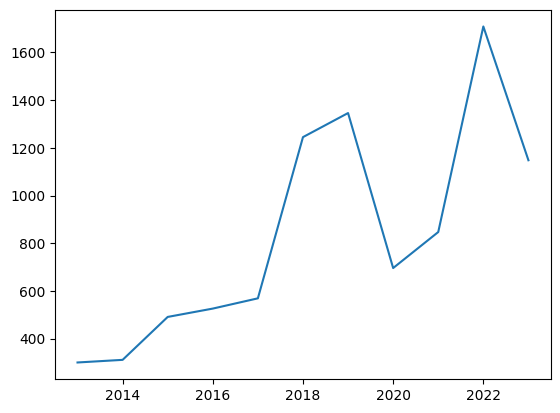

In [5]:
plt.plot(range(2013, 2024), counts_stations)

Вывод: 2023 необходимо рассматривать отдельно, т.к. значения сильно изменяются из года в год

## Анализ маршрутов

In [6]:
import networkx as nx

In [7]:
df = pd.read_table(f'clean_sources/2023/part-00000', index_col=False, header=None, names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation', 'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age'], sep=',')

In [8]:
stations = df[['startstation', 'endstation']]
stations.rename(columns={'startstation': 'source', 'endstation': 'target'})
graph = nx.Graph()
graph.add_edges_from(stations.to_numpy())

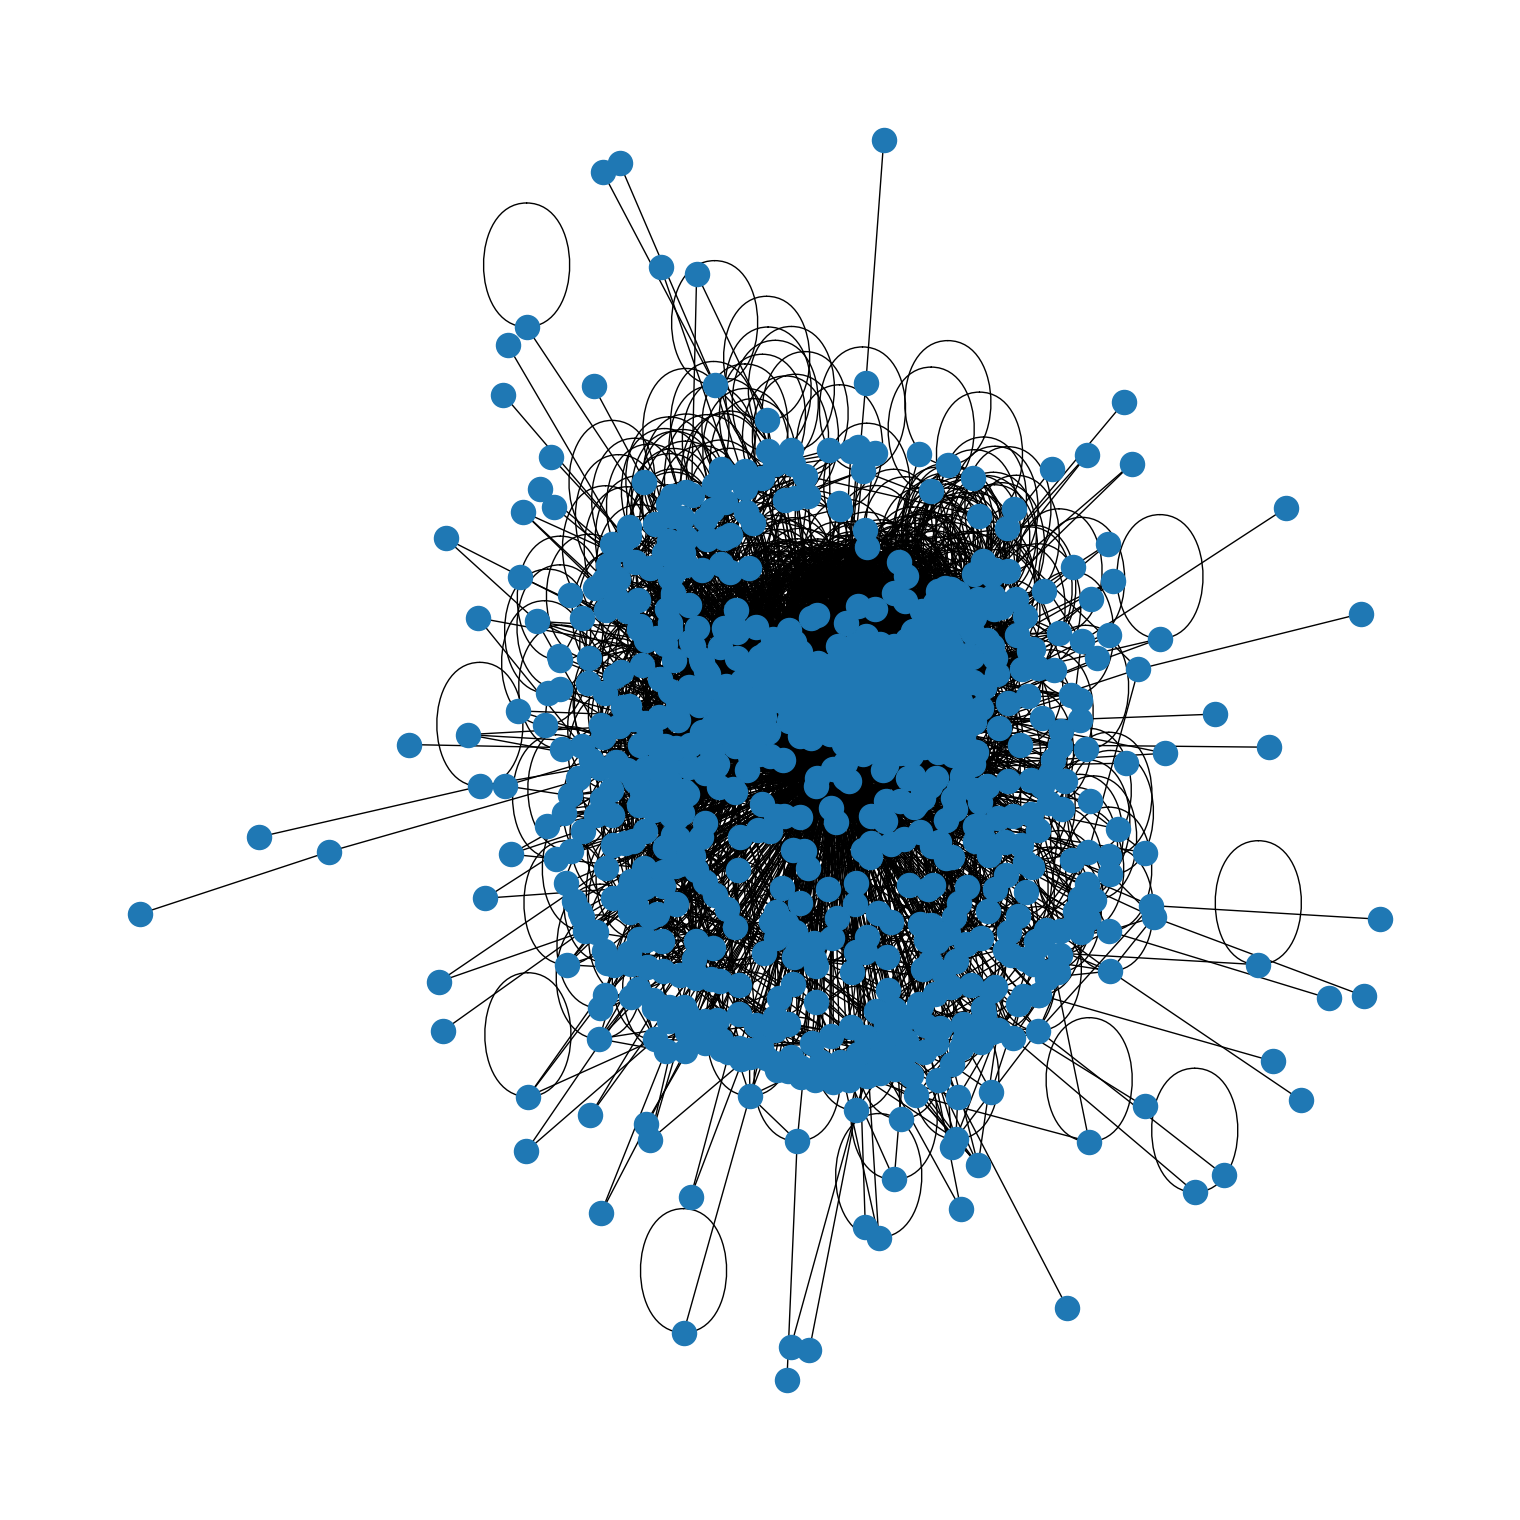

In [9]:
plt.figure(figsize=(15,15))
nx.draw(graph)

Вывод: существуют пункты, которые слабо связаны с остальными, поэтому они редко используются и, скорее всего, приносят малую прибыль; также имеют место быть круговые маршруты, быть может, они находятся в отдалении от других пунктов

## Анализ наиболее популярных типов байков на станции

In [49]:
stations = df[['id', 'startstation', 'biketype']].rename(columns={'startstation': 'station'}).groupby(by=['station']).agg({'id': 'count', 'biketype': pd.Series.mode}).reset_index()

In [56]:
stations.sort_values(by=['id'], ascending=False)[:10]

,station,id,biketype
1009,University Ave & 57th St,5908,classic_bike
265,Ellis Ave & 60th St,5744,classic_bike
179,Clinton St & Washington Blvd,5250,electric_bike
407,Kingsbury St & Kinzie St,4932,classic_bike
152,Clark St & Elm St,4423,classic_bike
106,Canal St & Adams St,4184,classic_bike
175,Clinton St & Madison St,4076,electric_bike
263,Ellis Ave & 55th St,3981,classic_bike
971,State St & Chicago Ave,3979,classic_bike
1042,Wells St & Concord Ln,3815,classic_bike


In [57]:
stations.sort_values(by=['id'])[:10]

,station,id,biketype
736,Public Rack - Laflin St &51st ST,1,electric_bike
670,Public Rack - Greenwood Ave & Lake Park Ave,1,electric_bike
735,Public Rack - Laflin St & 51st St,1,electric_bike
737,Public Rack - Lake Park Ave & 47th St,1,electric_bike
667,Public Rack - Forrestville Ave & 47th St,1,electric_bike
738,Public Rack - Langley Ave & 49th St,1,electric_bike
664,Public Rack - Ewing Ave & 96th St N,1,electric_bike
663,Public Rack - Ewing Ave & 95th St,1,electric_bike
834,Public Rack - Washington Park Ct & 51st St,1,electric_bike
662,Public Rack - Ewing Ave & 106th St,1,electric_bike


Вывод: наибольшей популярностью в самых популярных станциях пользуются классические байки, чем меньше популярность станции - тем чаще используются электробайки

## Поиск зависимости популярность пункта от его местоположения

In [82]:
stations = df[['id', 'startstation', 'startlat', 'startlng']].rename(columns={'startstation': 'station'}).groupby(by=['station']).agg({'id': 'count', 'startlat': 'max', 'startlng': 'max'}).reset_index()

In [83]:
stations['meanlat'], stations['meanlng'] = stations['startlat'].sum() / len(stations), stations['startlng'].sum() / len(stations)

In [84]:
stations['distance'] = ((stations['startlat'] - stations['meanlat']) ** 2 + (stations['startlng'] - stations['meanlng']) ** 2 ) ** 0.5

In [85]:
stations = stations[['id', 'distance']].sort_values('distance')

In [87]:
stations

,id,distance
20,541,0.003073
584,483,0.004782
55,577,0.008549
1094,967,0.008664
346,1044,0.008940
...,...,...
184,20,0.235002
613,1,0.239861
617,5,0.243371
345,18,0.246500


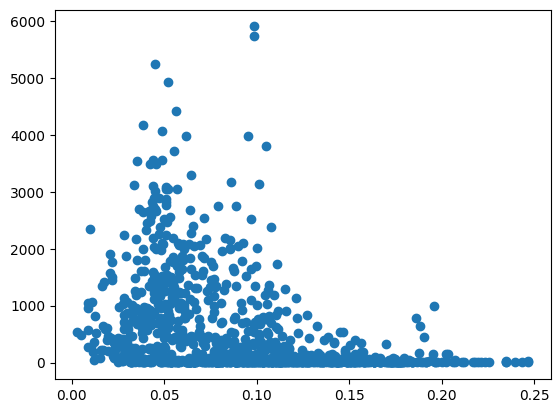

In [89]:
plt.scatter(stations['distance'], stations['id'])

Вывод: график смещен влево, из этого исходит, что при меньшем расстоянии от среднего значения будет больше вероятность того, что человек воспользуется станцией